Load things

In [1]:
from pathlib import Path
import os
import numpy as np

import nwb_datajoint as nd
import spiketoolkit as st
import pynwb

import warnings
warnings.simplefilter('ignore')

data_dir = Path('/stelmo/nwb') # CHANGE ME TO THE BASE DIRECTORY FOR DATA STORAGE ON YOUR SYSTEM

os.environ['NWB_DATAJOINT_BASE_DIR'] = str(data_dir)
os.environ['KACHERY_STORAGE_DIR'] = str(data_dir / 'kachery-storage')
os.environ['SPIKE_SORTING_STORAGE_DIR'] = str(data_dir / 'spikesorting')

Connecting kyu@lmf-db.cin.ucsf.edu:3306


Insert data

In [2]:
# define the file names
nwb_file_name = 'beans20190718.nwb'
filename, file_extension = os.path.splitext(nwb_file_name)
nwb_file_name2 = filename + '_' + file_extension

In [3]:
nd.common.SpikeSorting().delete()

About to delete:
`common_spikesorting`.`__spike_sorting`: 1 items


Proceed? [yes, No]:  yes


Committed.


In [4]:
nd.common.SpikeSorting.populate()

in spike sorting
writing new NWB file beans20190718_000002.nwb
Sorting {'nwb_file_name': 'beans20190718_.nwb', 'sort_group_id': 2, 'sorter_name': 'mountainsort4', 'parameter_set_name': 'franklab_mountainsort_20KHz', 'sort_interval_name': 'beans_short', 'analysis_file_name': 'beans20190718_000002.nwb'}...
Using 32 workers.
Using tmpdir: /tmp/tmp21ftg649
Num. workers = 32
Preparing /tmp/tmp21ftg649/timeseries.hdf5...
'end_frame' set to 199998
Preparing neighborhood sorters (M=24, N=199998)...
Neighboorhood of channel 3 has 3 channels.Neighboorhood of channel 4 has 4 channels.Neighboorhood of channel 6 has 3 channels.Neighboorhood of channel 5 has 4 channels.

Neighboorhood of channel 9 has 3 channels.Neighboorhood of channel 0 has 2 channels.Neighboorhood of channel 8 has 4 channels.Neighboorhood of channel 10 has 4 channels.Neighboorhood of channel 7 has 4 channels.Neighboorhood of channel 11 has 4 channels.Neighboorhood of channel 12 has 3 channels.

Detecting events on channel 4 (phas

ValueError: 0 is not a valid channel_id

In [9]:
nd.common.SpikeSorting()

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,sort_interval_name descriptive name for this interval,analysis_file_name the name of the file,units_object_id the object ID for the units for this sort group,units_waveforms_object_id the object ID for the unit waveforms,noise_waveforms_object_id the object ID for the noise waveforms,time_of_sort This is when the sort was done.
beans20190718_.nwb,2,mountainsort4,franklab_mountainsort_20KHz,beans_short,beans20190718_000001.nwb,9715ee7f-a788-4ef0-bfe9-c7e7b37051de,,,0


In [34]:
nd.insert_sessions([nwb_file_name])

Creating a copy of NWB file beans20190718.nwb with link to raw ephys data: beans20190718_.nwb
/stelmo/nwb/beans20190718.nwb
Populate Session...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 20000.0
Importing raw data: Estimated sampling rate:	20000.0 Hz
                    Number of valid intervals:	5
Populate SampleCount...
Populate DIOEvants...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
HeadDir...
Unable to import HeadDir: no Behavior module found in beans20190718-trim_.nwb
Unable to import HeadDir: no Behavior module found in beans20190718_.nwb
Unable to import HeadDir: no Behavior

Check tables

In [3]:
nd.common.Session() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning


In [4]:
nd.common.IntervalList() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start and end times for each interval
beans20190718_.nwb,01_s1,=BLOB=
beans20190718_.nwb,02_r1,=BLOB=
beans20190718_.nwb,03_s2,=BLOB=
beans20190718_.nwb,04_r2,=BLOB=
beans20190718_.nwb,pos 0 valid times,=BLOB=
beans20190718_.nwb,pos 1 valid times,=BLOB=
beans20190718_.nwb,pos 2 valid times,=BLOB=
beans20190718_.nwb,pos 3 valid times,=BLOB=
beans20190718_.nwb,raw data valid times,=BLOB=


In [5]:
nd.common.Raw() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,raw_object_id the NWB object ID for loading this object from the file,"sampling_rate Sampling rate calculated from data, in Hz",comments,description
beans20190718_.nwb,raw data valid times,d97e590f-4c09-470d-9a19-38d667b3c3da,20000.0,sample comment,Electrical series registered on electrode


In [13]:
nd.common.Probe.Electrode()

probe_type,probe_shank shank number within probe,probe_electrode electrode,contact_size (um) contact size,rel_x (um) x coordinate of the electrode within the probe,rel_y (um) y coordinate of the electrode within the probe,rel_z (um) z coordinate of the electrode within the probe
128c-4s8mm6cm-20um-40um-sl,0,0,20.0,0.0,0.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,1,20.0,0.0,-40.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,2,20.0,0.0,-80.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,3,20.0,0.0,-120.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,4,20.0,0.0,-160.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,5,20.0,0.0,-200.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,6,20.0,0.0,-240.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,7,20.0,0.0,-280.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,8,20.0,0.0,-320.0,0.0
128c-4s8mm6cm-20um-40um-sl,0,9,20.0,0.0,-360.0,0.0


Populate SortGroup

In [43]:
nd.common.SortGroup().set_group_by_shank(nwb_file_name2)

About to delete:
Nothing to delete


In [4]:
nd.common.SortGroup() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
beans20190718_.nwb,0,-1
beans20190718_.nwb,1,-1
beans20190718_.nwb,2,-1
beans20190718_.nwb,3,-1
beans20190718_.nwb,4,-1
beans20190718_.nwb,5,-1
beans20190718_.nwb,6,-1
beans20190718_.nwb,7,-1


In [6]:
nd.common.Electrode() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,electrode_group_name electrode group name from NWBFile,electrode_id the unique number for this electrode,probe_type,probe_shank shank number within probe,probe_electrode electrode,region_id,name unique label for each contact,original_reference_electrode the configured reference electrode for this electrode,x the x coordinate of the electrode position in the brain,y the y coordinate of the electrode position in the brain,z the z coordinate of the electrode position in the brain,filtering description of the signal filtering,impedance electrode impedance,bad_channel if electrode is 'good' or 'bad' as observed during recording,x_warped x coordinate of electrode position warped to common template brain,y_warped y coordinate of electrode position warped to common template brain,z_warped z coordinate of electrode position warped to common template brain,contacts label of electrode contacts used for a bipolar signal -- current workaround
beans20190718_.nwb,0,0,128c-4s8mm6cm-20um-40um-sl,0,0,1,0,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,1,128c-4s8mm6cm-20um-40um-sl,0,1,1,1,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,3,128c-4s8mm6cm-20um-40um-sl,0,3,1,3,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,4,128c-4s8mm6cm-20um-40um-sl,0,4,1,4,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,5,128c-4s8mm6cm-20um-40um-sl,0,5,1,5,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,7,128c-4s8mm6cm-20um-40um-sl,0,7,1,7,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,8,128c-4s8mm6cm-20um-40um-sl,0,8,1,8,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,9,128c-4s8mm6cm-20um-40um-sl,0,9,1,9,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,11,128c-4s8mm6cm-20um-40um-sl,0,11,1,11,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,
beans20190718_.nwb,0,12,128c-4s8mm6cm-20um-40um-sl,0,12,1,12,-1,0.0,0.0,0.0,None,0.0,False,0.0,0.0,0.0,


Load spike sorters and parameters

In [23]:
nd.common.SpikeSorter().insert_from_spikeinterface()
nd.common.SpikeSorterParameters().insert_from_spikeinterface()

In [26]:
nd.common.SpikeSorterParameters()

sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,parameter_dict dictionary of parameter names and values
hdsort,default,=BLOB=
herdingspikes,default,=BLOB=
ironclust,default,=BLOB=
kilosort,default,=BLOB=
kilosort2,default,=BLOB=
klusta,default,=BLOB=
mountainsort4,default,=BLOB=
mountainsort4,franklab_mountainsort_20KHz,=BLOB=
spykingcircus,default,=BLOB=
tridesclous,default,=BLOB=


Define a new set of spike sorter parameters from default and add to table

In [14]:
p = (nd.common.SpikeSorterParameters() & {'sorter_name': 'mountainsort4',\
                                          'parameter_set_name' : 'default'}).fetch1()

param = p['parameter_dict']
param['adjacency_radius'] = 0
param['curation'] = False
param['num_workers'] = 32
param['verbose'] = True
param['clip_size'] = 40
param['noise_overlap_threshold'] = 0

nd.common.SpikeSorterParameters().insert1({'sorter_name': 'mountainsort4', \
                                           'parameter_set_name' : 'franklab_mountainsort_20KHz2', \
                                           'parameter_dict' : param}, skip_duplicates='True')


In [4]:
nd.common.SpikeSorterParameters()

sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,parameter_dict dictionary of parameter names and values
hdsort,default,=BLOB=
herdingspikes,default,=BLOB=
ironclust,default,=BLOB=
kilosort,default,=BLOB=
kilosort2,default,=BLOB=
klusta,default,=BLOB=
mountainsort4,default,=BLOB=
mountainsort4,franklab_mountainsort_20KHz,=BLOB=
mountainsort4,franklab_mountainsort_20KHz2,=BLOB=
mountainsort4,franklab_mountainsort_30KHz,=BLOB=


In [5]:
(nd.common.SpikeSorterParameters & {'parameter_set_name':'franklab_mountainsort_20KHz'}).fetch()

array([('mountainsort4', 'franklab_mountainsort_20KHz', {'detect_sign': -1, 'adjacency_radius': 100, 'freq_min': 300, 'freq_max': 6000, 'filter': True, 'whiten': True, 'curation': False, 'num_workers': 32, 'clip_size': 40, 'detect_threshold': 3, 'detect_interval': 10, 'noise_overlap_threshold': 0, 'verbose': True})],
      dtype=[('sorter_name', 'O'), ('parameter_set_name', 'O'), ('parameter_dict', 'O')])

Define a sort interval

In [3]:
interval = (nd.common.IntervalList() & {'nwb_file_name' : nwb_file_name2,\
                                  'interval_list_name':'04_r2'}).fetch1('valid_times')

In [4]:
sort_interval = np.asarray([interval[0][0]+10, interval[0][0]+110])

In [5]:
nd.common.SortInterval().insert1({'nwb_file_name' : nwb_file_name2,\
                                  'sort_interval_name' : 'beans_04_r2_100s',\
                                  'sort_interval' : sort_interval},\
                                 skip_duplicates=True)

In [6]:
nd.common.SortInterval() & {'nwb_file_name' : nwb_file_name2}

nwb_file_name the name of the NWB file,sort_interval_name descriptive name for this interval,sort_interval 1D numpy array with start and end time for a single interval to be used for spike sorting
beans20190718_.nwb,beans_04_r2_100s,=BLOB=
beans20190718_.nwb,beans_short,=BLOB=


Define waveform parameters

In [38]:
# create the sorting waveform parameters table
n_noise_waveforms = 1000 # the number of random noise waveforms to save
waveform_param_dict = st.postprocessing.get_waveforms_params()
waveform_param_dict['grouping_property'] = 'group'
# set the window to half of the clip size before and half after
waveform_param_dict['ms_before'] = .75
waveform_param_dict['ms_after'] = .75
waveform_param_dict['dtype'] = 'i2'
waveform_param_dict['verbose'] = False
waveform_param_dict['max_spikes_per_unit'] = 1000
nd.common.SpikeSortingWaveformParameters.insert1({'waveform_parameters_name' : 'franklab default', \
                                                  'n_noise_waveforms' : n_noise_waveforms,\
                                                  'waveform_parameter_dict' : waveform_param_dict}, replace='True')

In [7]:
nd.common.SpikeSortingWaveformParameters()

waveform_parameters_name the name for this set of waveform extraction parameters,n_noise_waveforms the number of random noise waveforms to save,save_all_waveforms should we save all of the waveforms for future use.,waveform_parameter_dict a dictionary containing the SpikeInterface waveform parameters
franklab default,1000,True,=BLOB=


In [7]:
nd.common.SortInterval()

nwb_file_name the name of the NWB file,sort_interval_name descriptive name for this interval,sort_interval 1D numpy array with start and end time for a single interval to be used for spike sorting
beans20190718_.nwb,beans_04_r2_100s,=BLOB=
beans20190718_.nwb,beans_short,=BLOB=
Jaq20190826_.nwb,test,=BLOB=


Define spike sorting parameters (note: this is different from spike sor*ter* parameters defined above)

In [4]:
key = dict()
key['nwb_file_name'] = nwb_file_name2
key['sort_group_id'] = 2
key['sorter_name'] = 'mountainsort4'
key['parameter_set_name'] = 'franklab_mountainsort_20KHz'
key['sort_interval_name'] = 'beans_short'
key['waveform_parameters_name'] = 'franklab default'
key['interval_list_name'] = '04_r2'

nd.common.SpikeSortingParameters().insert1(key, skip_duplicates='True')

In [8]:
# (nd.common.SpikeSortingParameters & {'parameter_set_name': 'franklab_mountainsort_20KHz2'}).delete()
nd.common.SpikeSortingParameters()

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,sort_interval_name descriptive name for this interval,waveform_parameters_name the name for this set of waveform extraction parameters,interval_list_name descriptive name of this interval list
beans20190718_.nwb,2,mountainsort4,franklab_mountainsort_20KHz,beans_short,franklab default,04_r2


In [6]:
sort_interval =  (nd.common.SortInterval & {'nwb_file_name' : 'beans20190718_.nwb',
                                        'sort_interval_name' : 'beans_short'})\
                                            .fetch1('sort_interval')

Run spike sorting

In [3]:
nd.common.SpikeSorting().populate()

in spike sorting
writing new NWB file beans20190718_000000.nwb


TypeError: No conversion path for dtype: dtype('<U15')

Troubleshooting

In [70]:
raw_data_obj = (nd.common.Raw() & {'nwb_file_name' : nwb_file_name2}).fetch_nwb()[0]['raw']
timestamps = np.asarray(raw_data_obj.timestamps)

In [71]:
interval

array([[1.56686824e+09, 1.56686914e+09]])

In [77]:
np.searchsorted(timestamps, np.ravel(interval))

array([75488847, 75488847])

In [86]:
timestamps[75488847] - timestamps[75488847-1]

1669.8751361370087

In [87]:
interval[0][1]-interval[0][0]

903.6806597709656

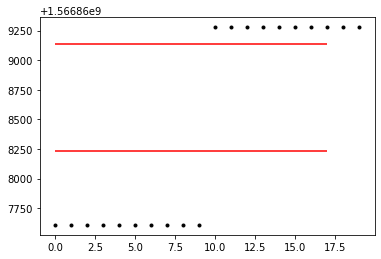

In [135]:
import matplotlib.pyplot as plt

plt.plot(timestamps[75488847-10:75488847+10],'k.')
plt.hlines(interval,xmin=0,xmax=17,color='r')

In [136]:
with pynwb.NWBHDF5IO(path='/stelmo/nwb/Jaq20190826.nwb', mode='r') as io:
    nwbf = io.read()
    samepochs = nwbf.epochs.to_dataframe()
#     epoch_dict = dict()
#     epoch_dict['nwb_file_name'] = nwb_file_name
#     for e in epochs.iterrows():
#         epoch_dict['interval_list_name'] = e[1].tags[0]
#         epoch_dict['valid_times'] = np.asarray([[e[1].start_time, e[1].stop_time]])
#         self.insert1(epoch_dict, skip_duplicates=True)ple_count = nd.common.get_data_interface(nwbf, 'sample_count')


In [148]:
io = pynwb.NWBHDF5IO(path='/stelmo/nwb/Jaq20190826.nwb', mode='r')
nwbf = io.read()

In [191]:
nwbf.intervals['mda_valid_times'].to_dataframe()

,start_time,stop_time
id,,
0,1.566864e+09,1.566864e+09
1,1.566864e+09,1.566865e+09
2,1.566865e+09,1.566865e+09
3,1.566866e+09,1.566866e+09
4,1.566866e+09,1.566867e+09
5,1.566867e+09,1.566867e+09
6,1.566867e+09,1.566868e+09
7,1.566868e+09,1.566868e+09
8,1.566868e+09,1.566868e+09


In [179]:
a = nwbf.intervals['epochs'].to_dataframe()['start_time'][5]

In [182]:
np.searchsorted(timestamps)

75488847

In [145]:
samepochs

,start_time,stop_time,tags
id,,,
0,1.566864e+09,1.566865e+09,[01_sleep]
1,1.566866e+09,1.566868e+09,[03_sleep]
2,1.566869e+09,1.566871e+09,[05_sleep]
3,1.566872e+09,1.566874e+09,[07_sleep]
4,1.566865e+09,1.566866e+09,[02_lineartrack]
5,1.566868e+09,1.566869e+09,[04_lineartrack]
6,1.566871e+09,1.566872e+09,[06_lineartrack]
